# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [3]:
df_wosp = df[(df['region']!='Saint Petersburg')]
df_wsp = df[(df['region']=='Saint Petersburg')]

df_wsp_5y = df[(df['region']=='Saint Petersburg') & (df['year']>=2012)]
df_wosp_5y = df[(df['region']!='Saint Petersburg') & (df['year']>=2012)]

##### Q1- How does the alcohol consumption of SP with other region?

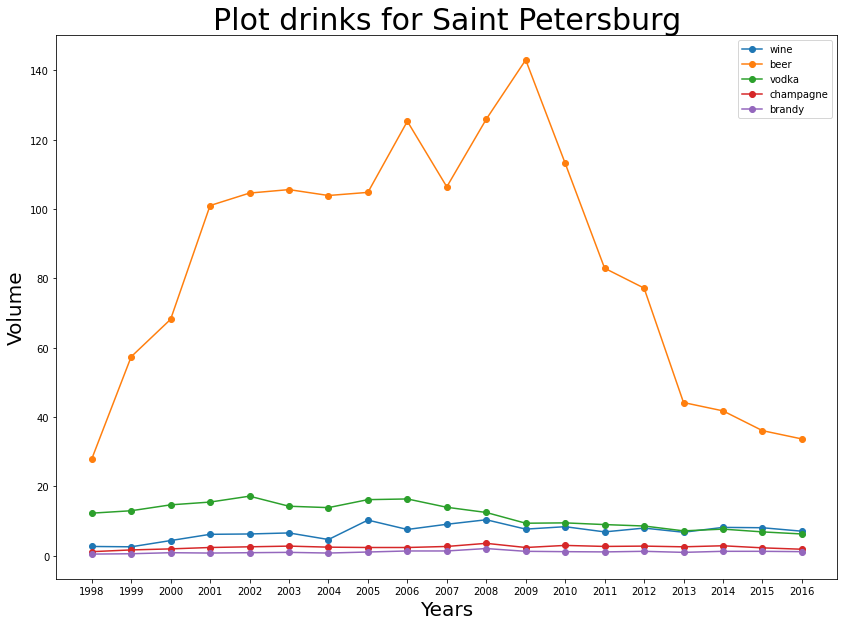

In [4]:
plt.figure(figsize=(14,10))
plt.plot(df_wsp.groupby('year')['wine','beer','vodka','champagne','brandy'].mean(), marker='o')
plt.title('Plot drinks for Saint Petersburg', fontsize=30)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.xticks(range(1998, 2017))
plt.legend(['wine','beer','vodka','champagne','brandy'])
plt.show()

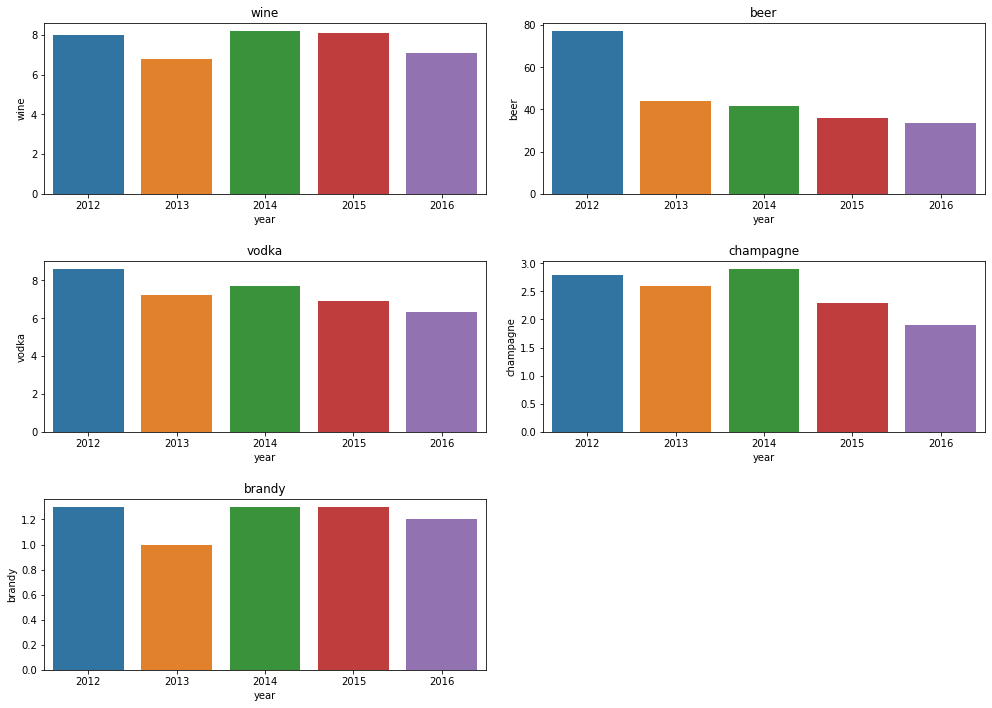

In [5]:
# We will foucs on 5 year rather than whole historical data because sales it is not necessary to analyze whole data as market situtaion changes time to time
plt.figure(figsize=(14,10))
def brandwise (l):
    a,b,c = 3,2,1
    for i in l:
        plt.subplot(a,b,c)
        plt.tight_layout(pad=2.0)
        plt.title(i)
        sns.barplot(x='year',y=i, data=df_wsp_5y)
        c+=1
    plt.show()
brandwise(['wine','beer','vodka','champagne','brandy'])

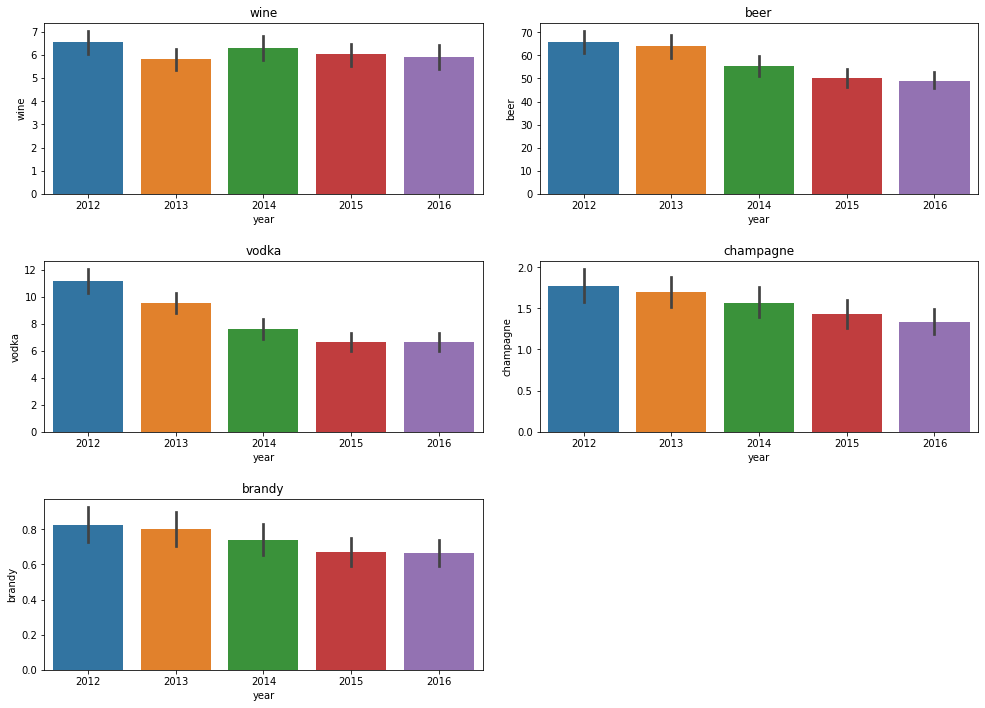

In [6]:
plt.figure(figsize=(14,10))
def brandwise_sp (l):
    a,b,c = 3,2,1
    for i in l:
        plt.subplot(a,b,c)
        plt.tight_layout(pad=2.0)
        plt.title(i)
        sns.barplot(x='year',y=i, data=df_wosp_5y)
        c+=1
    plt.show()
brandwise_sp(['wine','beer','vodka','champagne','brandy'])

In [7]:
grouped=df_wosp_5y.groupby('year').mean()
grouped.insert(0,"region",'other region')
grouped.reset_index(inplace=True)
sp_wo = pd.concat([grouped,df_wsp_5y],axis=0)
sp_wo.reset_index(inplace=True)

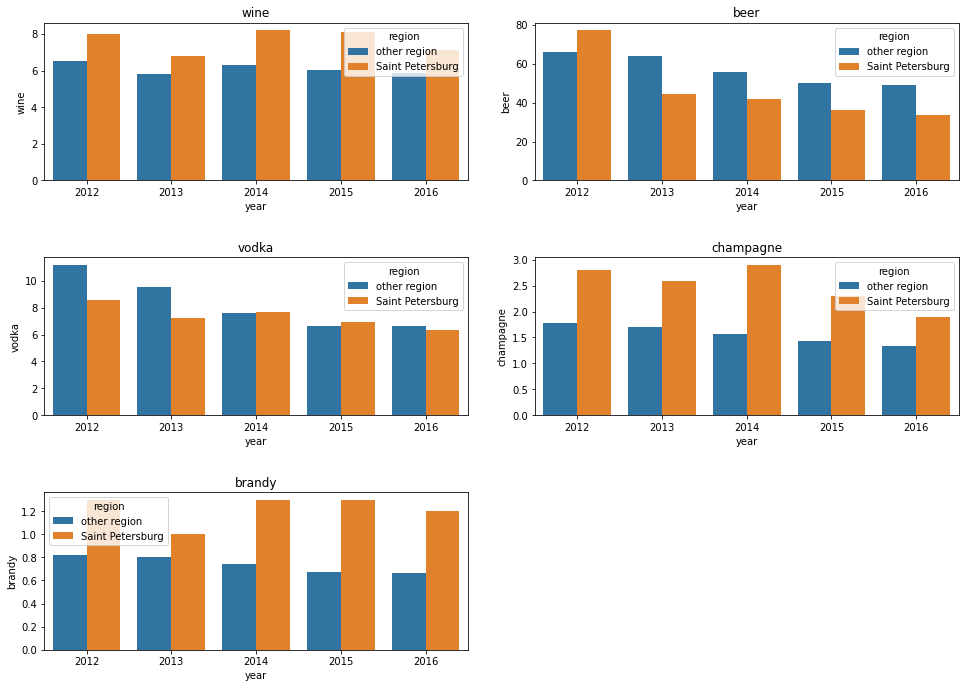

In [8]:
plt.figure(figsize=(14,10))
def g (l):
    a,b,c = 3,2,1
    for i in l:
        plt.subplot(a,b,c)
        plt.tight_layout(pad=3.0)
        sns.barplot(data=sp_wo, x='year', y=i, hue='region')
        plt.title(i)
        c+=1
    plt.show()
g(['wine','beer','vodka','champagne','brandy'])

<BarContainer object of 5 artists>

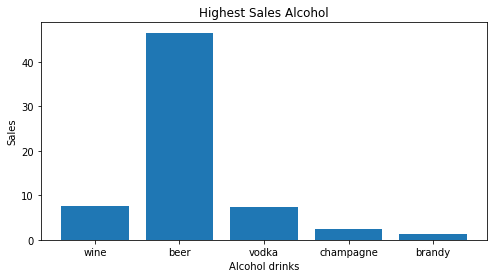

In [9]:
def brandwise (x):
    global d 
    d=[]
    l =[]
    plt.figure(figsize=(8, 4))
    for i in x:
        d.append(df_wsp_5y[i].mean())
        l.append(i)
        plt.title('Highest Sales Alcohol')
        plt.xlabel('Alcohol drinks')
        plt.ylabel('Sales')
    return plt.bar(l,d)
brandwise(['wine','beer','vodka','champagne','brandy'])

In [10]:
def lq (l):
    global k
    k=[]
    for i in l:
        k.append(df_wosp_5y[i].mean())
    return k
lq(['wine','beer','vodka','champagne','brandy'])

[6.115517241379311,
 56.79416058394161,
 8.3064039408867,
 1.5564039408866994,
 0.7386699507389162]

In [11]:
comp = pd.DataFrame(list(zip(d,k)),index=['wine','beer','vodka','champagne','brandy'],columns=['mean_sales_wsp_5y','mean_sales_wosp_5y'])
comp

,mean_sales_wsp_5y,mean_sales_wosp_5y
wine,7.64,6.115517
beer,46.60,56.794161
vodka,7.34,8.306404
champagne,2.50,1.556404
brandy,1.22,0.738670


#### Conclusion
The wine consumption in Saint Petersburg is 15% greater than the other region, same behaviour observed in champagne and brandy which is around 38% to 40%  however, beer and vodka are lower than other region.

Beer and vodka showing same consumption behaviour over the last 5 year observed drastically decreased, in general two resons are on top of downward sales quality and cost, however to conclude this situation further data need to be analyzed. Further in SP the highest selling alcohol is bear, however its consumption decreasing which shows customer shifting to other alcohols.

The market in Saint Petersburg can therefore be defined as having a high wine, brandy and champagne consumption, but a low beer and vodka consumption.

##### Q2- As mentioned after conduct promotion in SP observed better in sales so we check correlation of high consumption alcolhol with other drinks?

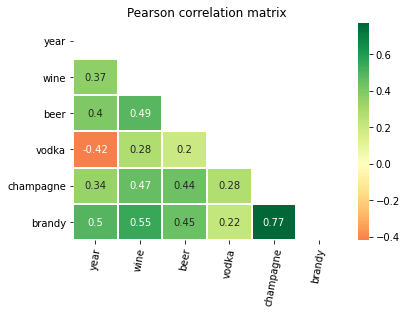

In [12]:
#Correlation in other regions
correlation = df_wosp.corr(method='pearson')
mask = np.triu(np.ones_like(correlation, dtype=bool))
ax = sns.heatmap(correlation, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True)
ax.set(title = 'Pearson correlation matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

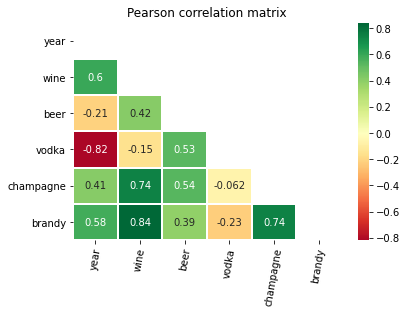

In [13]:
#Correlation in Saint Petersburg
correlation = df_wsp.corr(method='pearson')
mask = np.triu(np.ones_like(correlation, dtype=bool))
ax = sns.heatmap(correlation, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True)
ax.set(title = 'Pearson correlation matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

#### Conclusion:
0.3 - 0.5 low  0.5 - 0.7 Moderate  0.7 - 0.9 Strong <br>
Wine and Brandy in other regions is moderately correlated while in Saint Petersbug holds strong correlation, shows that if wine have consumption then brandy also tend to have high consumption, similar behaviour observed with champagne and brandy are strongly correlated, however wine and champagne are strong correlation in SP while weak moderate in other region.

Weak correlation observed with wine and vodka,beer in other regions however negatively but weak correlation observed in SP, finally this can be conclude that those region who consumes high brandy alcohol certainly consume high wine and champagne alocohol.

##### Q3- Identify similar region that shows similar behaviour of alcohol consumption like Saints Petersburg ?

In [14]:
df_5y = df[df['year']>=2012]

In [15]:
print(df_5y.isnull().sum()*100/len(df_5y))
print(len(df_5y))

year         0.000000
region       0.000000
wine         3.294118
beer         2.117647
vodka        3.294118
champagne    3.294118
brandy       3.294118
dtype: float64
425


In [16]:
def missing (feature,data):
    for i in feature:
        df_5y[feature] = df[feature].fillna(df_5y.mean())
    return data
data_c = missing(['wine','beer','vodka','champagne','brandy'],df_5y)
data_c.isnull().sum()/len(data_c)

year         0.0
region       0.0
wine         0.0
beer         0.0
vodka        0.0
champagne    0.0
brandy       0.0
dtype: float64

In [17]:
df_5_year_pivot = data_c.pivot_table(index = 'region', columns = 'year', fill_value = np.nan, aggfunc = np.mean)

mi = df_5_year_pivot .columns
mi.tolist()

index = pd.Index([str(i[0]) +'-'+ str(i[1]) for i in mi.tolist()])

df_5_year_pivot.columns = index

In [18]:
#transform data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_5_year_pivot)

scaled_5year = pd.DataFrame(scaled_features , index=df_5_year_pivot.index, columns=df_5_year_pivot.columns)
scaled_5year.head()

,beer-2012,beer-2013,beer-2014,beer-2015,beer-2016,brandy-2012,brandy-2013,brandy-2014,brandy-2015,brandy-2016,...,vodka-2012,vodka-2013,vodka-2014,vodka-2015,vodka-2016,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016
region,,,,,,,,,,,,,,,,,,,,,
Altai Krai,0.222149,0.059284,-0.146657,-0.228524,-0.710586,-0.974914,-0.953094,-1.119519,-1.026198,-1.070920,...,-0.002668,-0.222022,-0.636719,-0.704792,-0.719246,-0.789724,-0.702090,-0.889317,-0.713222,-0.488930
Altai Republic,-0.119504,-0.179976,-0.816597,-0.524958,-0.413071,-0.745224,-0.953094,-0.869028,-1.026198,-1.070920,...,-0.286600,-0.106736,0.353360,0.317685,-0.021459,-0.608834,-0.799653,-0.849166,-0.756319,-0.620490
Amur Oblast,0.468139,0.551879,0.424033,0.035572,-0.127700,-0.515534,-0.237813,-0.368046,-0.484232,-0.496411,...,0.591009,0.210299,0.203348,-0.001839,-0.220826,-0.337499,0.419888,-0.086293,-0.023669,0.125018
Arkhangelsk Oblast,-0.743591,-0.663188,0.443883,-0.050663,0.157671,0.632914,0.715895,0.633917,0.599699,0.652607,...,0.874941,1.420798,1.553456,1.627733,1.839308,1.200065,1.639429,1.760663,1.269243,1.089792
Astrakhan Oblast,0.645799,0.739534,0.369445,-0.681260,-0.649869,-0.285845,-0.476240,-0.117555,-0.213249,-0.209157,...,-0.389848,-0.625521,-0.546712,-0.640887,-0.719246,-0.834946,-0.799653,-0.487805,-0.583930,-0.620490


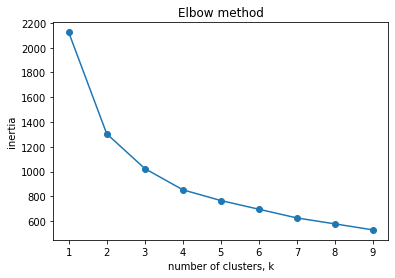

In [19]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k).fit(scaled_5year)
     
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title("Elbow method")
plt.xticks(ks)
plt.show()

In [20]:
#fit K means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state =11)
kmeans.fit(scaled_5year)

# Calculate the cluster labels: labels
clusters = kmeans.predict(scaled_5year)
df_5_year_pivot["cluster"] = clusters

In [21]:
centroids = kmeans.cluster_centers_

In [22]:
#create a 5 year average column for each drink for plotting
df_5_year_pivot['5yr_avg_beer'] = round(df_5_year_pivot[['beer-2012', 'beer-2013', 'beer-2014', 'beer-2015', 'beer-2016']].mean(axis=1),1)
df_5_year_pivot['5yr_avg_wine'] = round(df_5_year_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].mean(axis=1),1)
df_5_year_pivot['5yr_avg_brandy'] = round(df_5_year_pivot[['brandy-2012', 'brandy-2013', 'brandy-2014', 'brandy-2015', 'brandy-2016']].mean(axis=1),1)
df_5_year_pivot['5yr_avg_champagne'] = round(df_5_year_pivot[['champagne-2012', 'champagne-2013', 'champagne-2014', 'champagne-2015', 'champagne-2016']].mean(axis=1),1)
df_5_year_pivot['5yr_avg_vodka'] = round(df_5_year_pivot[['vodka-2012', 'vodka-2013', 'vodka-2014', 'vodka-2015', 'vodka-2016']].mean(axis=1),1)

In [23]:
#summarize dataframe by cluster
cluster_agg = df_5_year_pivot.groupby('cluster').agg({
    '5yr_avg_beer': 'mean',
    '5yr_avg_wine': 'mean',
    '5yr_avg_brandy' : 'mean',
  '5yr_avg_champagne' : 'mean',
  '5yr_avg_vodka' : 'mean'
}).round(1).reset_index()

cluster_agg = cluster_agg.rename(columns={"5yr_avg_beer": "avg 5yr beer consumption (L)",
                                "5yr_avg_wine": "avg 5yr wine consumption (L)",
                                "5yr_avg_brandy": "avg 5yr brandy consumption (L)",
                                "5yr_avg_champagne": "avg 5yr champagne consumption (L)",
                                "5yr_avg_vodka": "avg 5yr vodka consumption (L)"})
pd.pandas.set_option('display.max_rows', None)
cluster_agg

,cluster,avg 5yr beer consumption (L),avg 5yr wine consumption (L),avg 5yr brandy consumption (L),avg 5yr champagne consumption (L),avg 5yr vodka consumption (L)
0,0,63.9,8.1,1.2,2.3,11.6
1,1,53.1,5.2,0.5,1.2,6.7


In [24]:
df_5_year_pivot.loc['Saint Petersburg','cluster'] #Cluster identification 

0

##### Saint Petersburg is in cluster 0 so, it means cluster 0 contain same behaviour which is indentified above so, for the confirmation we check cluster 0's highest selling alcohol and correlation, whether the brandy with wine and champange is similar to the SP or not.

In [25]:
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [26]:
cluster_0 = df_5_year_pivot[(df_5_year_pivot['cluster']==0)]
#cluster = cluster_0.pivot_table(index = 'region', columns = 'year')

In [27]:
regions = cluster_0.index
regions

Index(['Arkhangelsk Oblast', 'Chukotka Autonomous Okrug', 'Kaliningrad Oblast',
       'Kaluga Oblast', 'Kamchatka Krai', 'Khabarovsk Krai',
       'Khanty–Mansi Autonomous Okrug – Yugra', 'Kirov Oblast',
       'Komi Republic', 'Leningrad Oblast', 'Magadan Oblast', 'Moscow',
       'Moscow Oblast', 'Murmansk Oblast', 'Nenets Autonomous Okrug',
       'Novgorod Oblast', 'Primorsky Krai', 'Pskov Oblast',
       'Republic of Karelia', 'Saint Petersburg', 'Sakhalin Oblast',
       'Smolensk Oblast', 'Sverdlovsk Oblast', 'Tver Oblast', 'Tyumen Oblast',
       'Vologda Oblast', 'Yamalo-Nenets Autonomous Okrug', 'Yaroslavl Oblast'],
      dtype='object', name='region')

In [28]:
cluster0 = data_c[data_c.region.isin(regions)]

<AxesSubplot:>

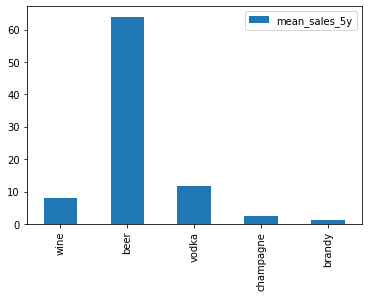

In [29]:
def avg (l):
    d = []
    for i in l:
        d.append(cluster0[i].mean())
    return pd.DataFrame(d,index=['wine','beer','vodka','champagne','brandy'],columns=['mean_sales_5y']).plot(kind='bar')
avg(['wine','beer','vodka','champagne','brandy'])

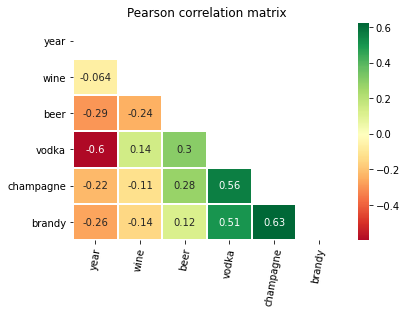

In [30]:
#Correlation in other regions
correlation = cluster0.corr(method='pearson')
mask = np.triu(np.ones_like(correlation, dtype=bool))
ax = sns.heatmap(correlation, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True)
ax.set(title = 'Pearson correlation matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

##### As it can be seen clearly that the correlation of brandy with wine and vodka is not similar as we found in Saint Petersburg analysis, however brand wise alocohol sale is same. In conclusion we cannot selected cluster 0 to be similar like SP. It is therefore we focus on becuase brandy and is best suited for forecasting wine consumption.

##### Q3-Can we identify regions that show an overall similar brandy consumption pattern over the past 5 years as Saint Petersburg?

In [31]:
wine = df[(df['year']>=2012)]
wine = wine[['year','region','wine']]
wine.head()

,year,region,wine
1190,2012,Republic of Adygea,3.1
1191,2012,Altai Krai,4.8
1192,2012,Amur Oblast,5.8
1193,2012,Arkhangelsk Oblast,9.2
1194,2012,Astrakhan Oblast,4.7


In [32]:
#Imputing missing values
def missing_wine (l,data):
    wine[l] = wine[l].fillna(wine[l].mean())
    return data
wine_r = missing_wine(['wine'],wine)
wine_r.isnull().sum()/len(wine_r)

year      0.0
region    0.0
wine      0.0
dtype: float64

In [33]:
wine_5_year_pivot = wine_r.pivot_table(index = 'region',columns = 'year', fill_value = np.nan, aggfunc = np.mean)
#create list of multilevel column names
mi = wine_5_year_pivot.columns
mi.tolist()

#create merged columnnames
ind = pd.Index([ str(e[0]) + "-" + str(e[1])  for e in mi.tolist()])

#set the list as the column titels
wine_5_year_pivot .columns = ind
wine_5_year_pivot.head()

,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016
region,,,,,
Altai Krai,4.8,4.4,4.1,4.4,4.8
Altai Republic,5.2,4.2,4.2,4.3,4.5
Amur Oblast,5.8,6.7,6.1,6.0,6.2
Arkhangelsk Oblast,9.2,9.2,10.7,9.0,8.4
Astrakhan Oblast,4.7,4.2,5.1,4.7,4.5


In [34]:
#create mean wine consumption column
wine_5_year_pivot['avg_wine_5yr'] = round(wine_5_year_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].mean(axis=1),1)

#create minimum wine consumption column
wine_5_year_pivot['min_wine_5yr'] = round(wine_5_year_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].min(axis=1),1)

#create maximum wine consumption column
wine_5_year_pivot['max_wine_5yr'] = round(wine_5_year_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].max(axis=1),1)

#create 5 year change in wine consumption column
wine_5_year_pivot['perc_change_5yr'] = round((wine_5_year_pivot['wine-2016'] - wine_5_year_pivot['wine-2012'])/(wine_5_year_pivot['wine-2012'])*100,1)

wine_5_year_pivot.head()

,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016,avg_wine_5yr,min_wine_5yr,max_wine_5yr,perc_change_5yr
region,,,,,,,,,
Altai Krai,4.8,4.4,4.1,4.4,4.8,4.5,4.1,4.8,0.0
Altai Republic,5.2,4.2,4.2,4.3,4.5,4.5,4.2,5.2,-13.5
Amur Oblast,5.8,6.7,6.1,6.0,6.2,6.2,5.8,6.7,6.9
Arkhangelsk Oblast,9.2,9.2,10.7,9.0,8.4,9.3,8.4,10.7,-8.7
Astrakhan Oblast,4.7,4.2,5.1,4.7,4.5,4.6,4.2,5.1,-4.3


In [35]:
# transform data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_5_year_pivot)

#create scaled df
scaled_wine_5year = pd.DataFrame(scaled_features , index=wine_5_year_pivot.index, columns=wine_5_year_pivot.columns)

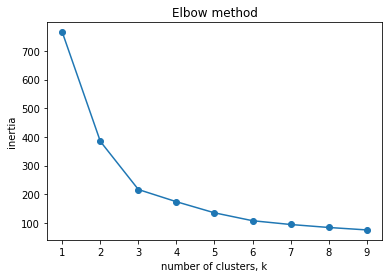

In [36]:
#Create an ellbow plot to determine the optimal number of features
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k).fit(scaled_wine_5year)
     
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title("Elbow method")
plt.xticks(ks)
plt.show()

In [37]:
#fit Kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state =11)
kmeans.fit(scaled_wine_5year)

# Calculate the cluster labels: labels
cluster = kmeans.predict(scaled_wine_5year)
scaled_wine_5year['cluster'] = cluster
wine_5_year_pivot['cluster'] = cluster

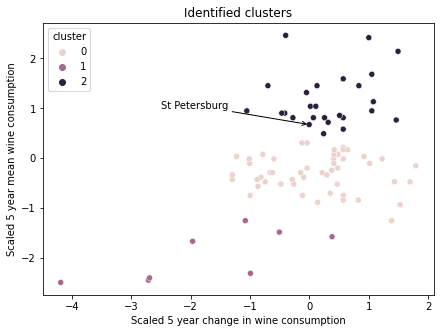

In [38]:
fig, axes = plt.subplots(figsize=(7, 5), sharex = True)

#set variables for Saint Petersburg
avg_wine = scaled_wine_5year.loc['Saint Petersburg', 'avg_wine_5yr']
change_wine = scaled_wine_5year.loc['Saint Petersburg', 'perc_change_5yr']

#plot 3 clusters
ax =sns.scatterplot(data = scaled_wine_5year, x = 'perc_change_5yr', y ='avg_wine_5yr' , hue = 'cluster')
ax.set (title = 'Identified clusters', xlabel = 'Scaled 5 year change in wine consumption', ylabel = 'Scaled 5 year mean wine consumption') 

#annotate cluster
ax.annotate("St Petersburg",
            xy=(change_wine, avg_wine), xycoords='data',
            xytext=(-2.5, 1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3") )

plt.show()

In [39]:
cluster_agg = wine_5_year_pivot.groupby('cluster').agg({
    'avg_wine_5yr': 'mean',
    'min_wine_5yr': 'mean',
    'max_wine_5yr' : 'mean',
  'perc_change_5yr' : 'mean'
}).round(1).reset_index()

cluster_agg = cluster_agg.rename(columns={"avg_brandy_5yr": "avg 5yr brandy consumption (L)",
                                "min_brandy_5yr": "avg minimum 5yr brandy consumption (L)",
                                "max_brandy_5yr": "avg maximum 5yr brandy consumption (L)",
                                "perc_change_5yr": "Change in brandy consumption 2012-2016 (%)"})

cluster_agg

,cluster,avg_wine_5yr,min_wine_5yr,max_wine_5yr,Change in brandy consumption 2012-2016 (%)
0,0,5.5,4.9,6.3,-8.9
1,1,1.9,1.4,2.5,-45.1
2,2,8.7,7.6,9.7,-5.2


In [40]:
#create a list of all regions that are found in cluster 2: high wine consuming regions
cluster2_wine = wine_5_year_pivot[wine_5_year_pivot['cluster']==2]
wine_regions = list(cluster2_wine.index.values)

In [41]:
#create a df with all high-consuming wine regions from 2012 onwards
df_5yr_selected = df[(df['year']>=2012) & (df['region'].isin(wine_regions))]
df_5yr_selected.head()

,year,region,wine,beer,vodka,champagne,brandy
1193,2012,Arkhangelsk Oblast,9.2,49.2,14.4,2.3,1.1
1197,2012,Bryansk Oblast,8.4,50.9,10.0,1.6,0.5
1199,2012,Vladimir Oblast,8.0,46.6,11.9,1.5,0.7
1201,2012,Vologda Oblast,9.8,108.6,14.9,1.3,0.8
1206,2012,Ivanovo Oblast,9.2,92.8,11.9,1.7,0.6


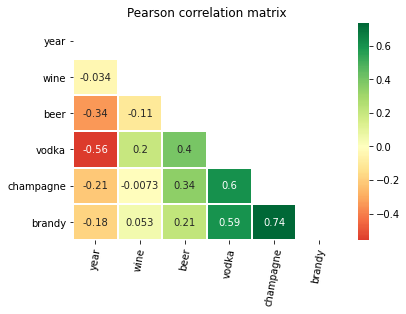

In [42]:
#Correlation in other regions
correlation = df_5yr_selected.corr(method='pearson')
mask = np.triu(np.ones_like(correlation, dtype=bool))
ax = sns.heatmap(correlation, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True)
ax.set(title = 'Pearson correlation matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

<AxesSubplot:>

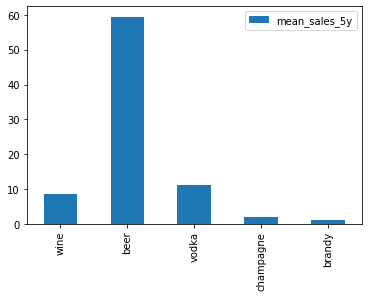

In [43]:
def avg (l):
    d = []
    for i in l:
        d.append(df_5yr_selected[i].mean())
    return pd.DataFrame(d,index=['wine','beer','vodka','champagne','brandy'],columns=['mean_sales_5y']).plot(kind='bar')
avg(['wine','beer','vodka','champagne','brandy'])

##### SP exist in cluster but it can be seen clearly that cluster 2 regions wine is not highly correlated with brandy, however highest sale of beer is same SP, now we will find the regions that are highly correlated wine.

In [44]:
l = dict(df.groupby('region').corr()['brandy'].sort_values(ascending = True))

In [45]:
r = []
v = []
for k,g in l.items():
    r.append(k)
    v.append(g)

In [46]:
Region_corr = pd.DataFrame(r,columns=['regions','alcohol'])

In [47]:
Region_corr['corr'] = v

In [48]:
high_corr = Region_corr[(Region_corr['corr']>=0.8) & (Region_corr['alcohol']=='wine')]

In [49]:
d= high_corr['regions']
consumption = df[(df['region'].isin(d)) & (df['year']>=2012)]
def missing_corr (features, data):
    for i in features:
        data[features] = data[features].fillna(data[features].mean())
    return data
conumption_corr = missing_corr((['wine','vodka','champagne','brandy','beer']),consumption)
conumption_corr.isnull().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

In [50]:
conumption_corr['total'] = conumption_corr['wine']+ conumption_corr['beer'] +conumption_corr['vodka']+conumption_corr['champagne']+conumption_corr['brandy']

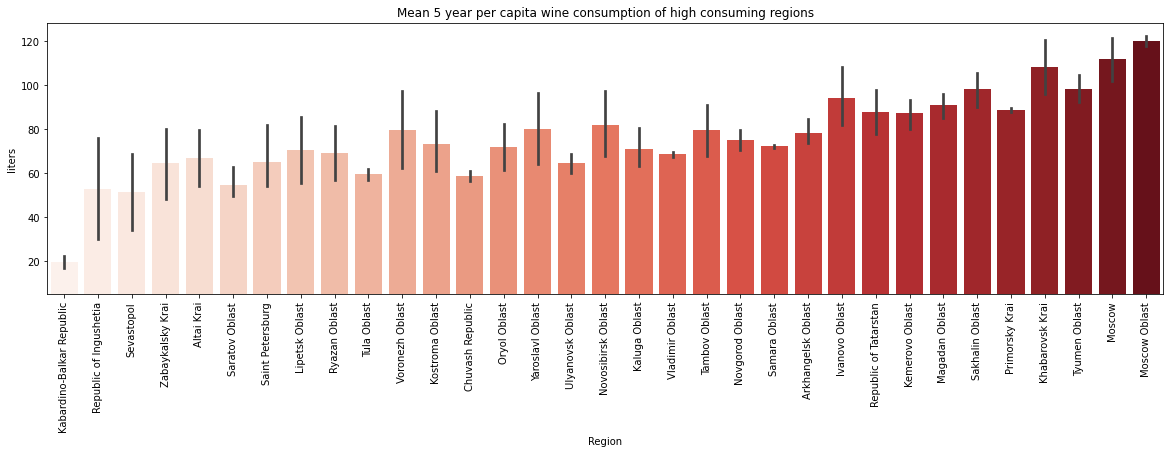

In [51]:
fig, axes = plt.subplots(figsize=(20, 5))

#plot sorted wine df
wine_sorted = conumption_corr.sort_values('total')
ax = sns.barplot(data =wine_sorted, y = 'total', x = 'region', palette = 'Reds' )


#set labels
ax.set (title = 'Mean 5 year per capita wine consumption of high consuming regions', xlabel= 'Region', ylabel = 'liters')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(5,)
plt.show()

In [52]:
d = conumption_corr.groupby('region')['wine','vodka','champagne','brandy','beer','total'].mean()

In [53]:
d.nsmallest(10,['total']).index

Index(['Kabardino-Balkar Republic', 'Sevastopol', 'Republic of Ingushetia',
       'Saratov Oblast', 'Chuvash Republic', 'Tula Oblast', 'Zabaykalsky Krai',
       'Ulyanovsk Oblast', 'Saint Petersburg', 'Altai Krai'],
      dtype='object', name='region')

##### Conclusion:
Mentioned above are the best regions for promotion with overall least consumption among all regions.